In [14]:
#import packages

import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rc('font', size=16)
plt.rc('legend', fontsize=10)

## Creating Time-series data of Van-der pol Duffing oscillator.

In [15]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

beta = 2.0
mu =  10.0

def f(state, t):
    x, y = state  # Unpack the state vector
    return y , -x - beta*x**3  - mu*y*(x**2 - 1)  # Derivatives

state0 = [2.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)


x = states[:,0]
y = states[:,1]


In [16]:
Duffing = np.stack((x, y), axis=-1)  # First column is x, second is y

## A glimse of the dataset . This is the X matrix of the report.

In [17]:
Duffing

array([[ 2.        ,  1.        ],
       [ 2.00781531,  0.58325126],
       [ 2.01201907,  0.27291015],
       ...,
       [-1.19439728,  0.84467794],
       [-1.18589976,  0.85490773],
       [-1.17729746,  0.86563865]])

## Building the Model

In [18]:
# The \dot{X} matrix is obtained by second order finite difference method

differentiation_method = ps.FiniteDifference(order=2)

#The polynomial library is made upto order 4. We have assume that the system will 
#not have much higher degree of polynomial.
#The degree is a hyperparameter in the system.

feature_library = ps.PolynomialLibrary(degree=4)

#The optimization algorithm to be used is the Sequentially 
#thresholded Least Squares with a threshold value
# of 0.01. One can use different threshold value. 
#This is the hyperparameters of the system.

optimizer = ps.STLSQ(threshold=0.005)

## The Model

In [19]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y","z"]
)

## Compiling the model

In [20]:
model.fit(Duffing,t= 0.01,quiet=True);

## Printing out the Model Equations


The original Duffing-Van der pol equation is 

$$ x^{\prime}= y $$
$$ y^{\prime}= -x - 2x^{3} - 10y(x^2 - 1)$$




In [21]:
model.print()

x' = 0.998 y
y' = -1.002 x + 9.914 y + -1.995 x^3 + -9.914 x^2 y


## Wow this is almost same as the original equation. Modelling is done, now let see the prediction part.

In [22]:
X_initial = [2.0,1.0]
T = np.arange(0,40,0.01)

x_sim = model.simulate(X_initial, T)

## Plotting

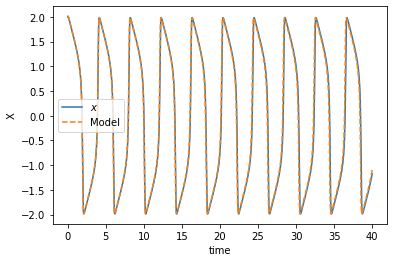

In [81]:
plt.plot(T,x,label="$x$")
plt.plot(T,x_sim[:,0],"--",label ="Model")
plt.xlabel('time')
plt.ylabel('X')
plt.legend()
#plt.savefig('x-dvdp.pdf')
plt.show()

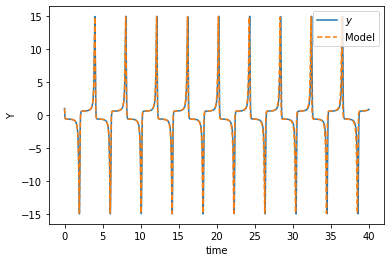

In [82]:
plt.plot(T,y,label="$y$")
plt.plot(T,x_sim[:,1],"--",label ="Model")
plt.xlabel('time')
plt.ylabel('Y')
plt.legend()
#plt.savefig('y-dvdp.pdf')
plt.show()

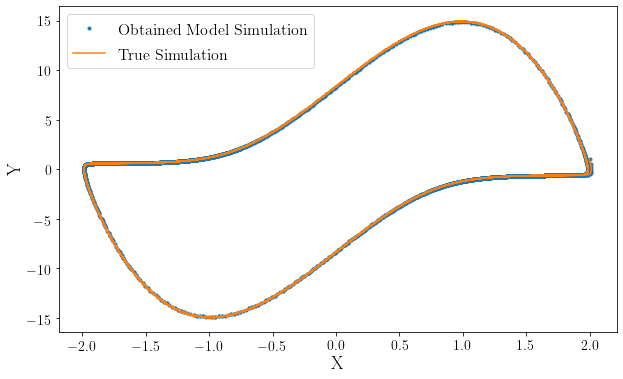

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(x_sim[:,0],x_sim[:,1],".",label ="Obtained Model Simulation")
plt.plot(x,y,label="True Simulation")
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 16})
plt.savefig('xy-dvdp.pdf')
plt.show()

## That's Perfect. Let us check on more sensitive system: the famous Rossler system

## Creating Time-series data of Numerically SImulated Rossler Equation.

In [24]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

a = 0.2
b = 0.2
c = 5.7

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return -y - z, x + a*y , b + x*z - c*z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 100.0, 0.01)

states = odeint(f, state0, t)


x = states[:,0]
y = states[:,1]
z = states[:,2]




In [25]:
Lorenz = np.stack((x, y,z), axis=-1)  # First column is x, second is y, third is z

## A glimse of the dataset . This is the X matrix of the report.

In [26]:
Lorenz

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.98016212,  1.01191249,  0.95594608],
       [ 0.96063724,  1.02365182,  0.91373936],
       ...,
       [ 9.561594  , -3.78602904,  0.71575912],
       [ 9.59170518, -3.69774541,  0.7460915 ],
       [ 9.62062074, -3.60898958,  0.77785213]])

## Building the Model

In [27]:
# The \dot{X} matrix is obtained by second order finite difference method
differentiation_method = ps.FiniteDifference(order=2)

#The polynomial library is made upto order 5. We have assume that the system will 
#not have much higher degree of polynomial.
#The degree is a hyperparameter in the system.

feature_library = ps.PolynomialLibrary(degree=4)


#The optimization algorithm to be used is the Sequentially 
#thresholded Least Squares with a threshold value
# of 0.04. One can use different threshold value. 
#This is the hyperparameters of the system.

optimizer = ps.STLSQ(threshold=0.05)

## The Model

In [28]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y","z"]
)

## Compiling the model

In [29]:

model.fit(Lorenz,t= 0.01,quiet=True);

## Printing out the Model Equations


The original Lorenz equation is 

$$ x^{\prime}= -y - z $$
$$ y^{\prime}= x + 0.1y $$
$$ z^{\prime}= 0.1 + xz - 14z $$

In [8]:
model.print()

x' = -1.000 y + -1.000 z
y' = 1.000 x + 0.200 y
z' = 0.200 1 + -5.697 z + 1.000 x z


## Wow this is almost same as the original equation. Modelling is done, now let see the prediction part.



In [31]:
X_initial = [1,1,1]
T = np.arange(0,100,0.01)

x_sim = model.simulate(X_initial, T)

## Plotting

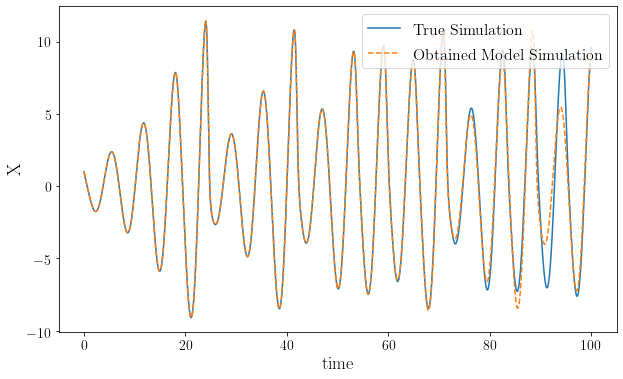

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(T,x,label=r"True Simulation")
plt.plot(T,x_sim[:,0],"--",label =r" Obtained Model Simulation")
plt.xlabel(r'time',fontsize = 18)
plt.ylabel(r'X',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.savefig('x-rossler.pdf')
plt.show()


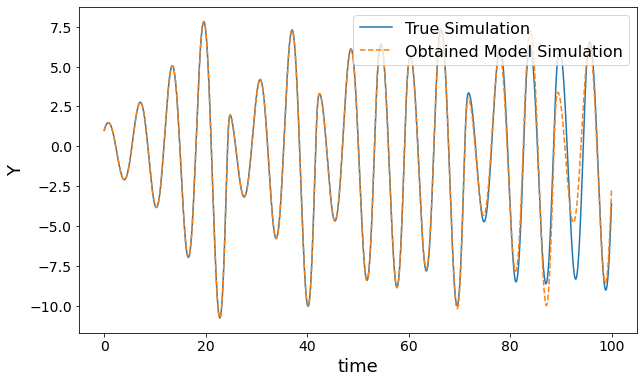

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(T,y,label="True Simulation")
plt.plot(T,x_sim[:,1],"--",label ="Obtained Model Simulation")
plt.xlabel('time',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.savefig('y-rossler.pdf')
plt.show()

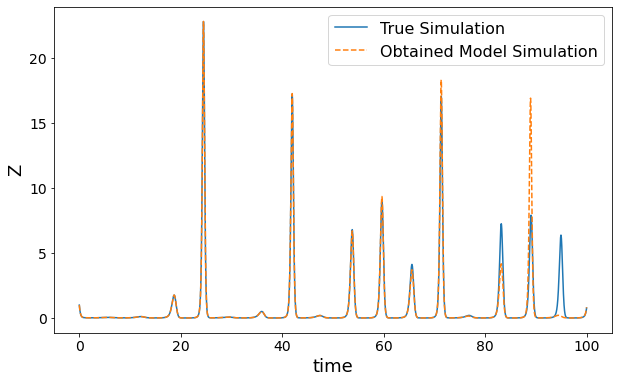

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(T,z,label="True Simulation")
plt.plot(T,x_sim[:,2],"--",label ="Obtained Model Simulation")
plt.xlabel('time',fontsize = 18)
plt.ylabel('Z',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right',prop={'size': 16})
plt.savefig('z-rossler.pdf')
plt.show()

## The system is very sensitive to slight perturbation due to positive Lyapunov exponents in the system. The model predict the system upto a good extent and also got the butterfly pattern which is the trademark of the system. More details in the report.

In [13]:
with open('data1.dat','w') as f:
    for i in range(len(x)):
        f.write(str(x[i]) + " " + str(y[i])+ " "+str(z[i])+ " "+str(x_sim[:, 0][i])+ " "+str(x_sim[:, 1][i])+ " "+ str(x_sim[:, 2][i])+'\n')
        

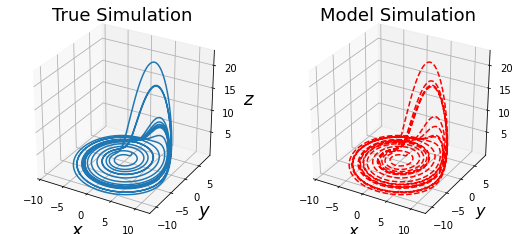

In [12]:

fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(131, projection="3d")
ax.plot(x,y,z)
plt.title(r"True Simulation",fontsize = '18')
ax.set_xlabel(r"$x$",fontsize = '18')
ax.set_ylabel(r"$y$",fontsize = '18')
ax.set_zlabel(r"$z$",fontsize = '18')





ax = fig.add_subplot(132, projection="3d")
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2],'r--')
plt.title(r"Model Simulation",fontsize = '18')
ax.set_xlabel(r"$x$",fontsize = '16',linespacing=3.2)
ax.set_ylabel(r"$y$",fontsize = '16')
ax.set_zlabel(r"$z$",linespacing=3.2)


plt.savefig('both.pdf',bbox_inches = 'tight',pad_inches = 50)



## both.pdf is better plotted in code-sayan.py

## Extra: Weak noise limit numerical simulation of Lorenz data

In [67]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

#define Runge-Kutta 4th order
def rk4(func,x,y,z,dt):
    k1 = func(x,y,z)*dt
    k2 = func(x + 0.5*k1, y + 0.5*k1, z + 0.5*k1)*dt
    k3 = func(x + 0.5*k2, y + 0.5*k2, z + 0.5*k2)*dt
    k4 = func(x + k3, y + k3, z + k3)*dt
    xn = x + (1/6.0)*(k1+2*k2+2*k3+k4)
    yn = y + (1/6.0)*(k1+2*k2+2*k3+k4) 
    zn = z + (1/6.0)*(k1+2*k2+2*k3+k4)
    return xn,yn,zn

#lorenz equation
def f1(x,y,z):
    return sigma * (y - x)  # derivatives


def f2(x,y,z):
    return x * (rho - z) - y   # derivatives


def f3(x,y,z):
    return x * y - b * z  # derivatives

dt=0.001

#time array
t = np.arange(0.0, 40.0, dt)


#parameters
rho = 28.0
sigma = 10
b = 8.0/3.0


#creating array of zero
x1 =  np.zeros(len(t))
y1 =  np.zeros(len(t))
z1 =  np.zeros(len(t))

#initial condition
x1[0] = 1.0
y1[0] = 1.0
z1[0] = 1.0

#noise Intensity
d = 0.001

#with noise
for i in range(len(t)-1):
    x1[i+1] =  rk4(f1, x1[i], y1[i], z1[i], dt )[0]
    y1[i+1] =  rk4(f2, x1[i], y1[i], z1[i], dt )[1]
    z1[i+1] =  rk4(f3, x1[i], y1[i], z1[i], dt )[2] + np.sqrt(2.0*d*dt)*np.random.normal(0.,1.,1)


    

In [68]:
Lorenz_noisy = np.stack((x1, y1,z1), axis=-1)  # First column is x, second is y, third is z

In [69]:
Lorenz_noisy

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.02632749,  1.00082864],
       [ 1.00026327,  1.05262748,  0.99975252],
       ...,
       [14.35685059, 18.59040893, 30.27451459],
       [14.39918617, 18.53961191, 30.4659313 ],
       [14.44059043, 18.48604386, 30.65477833]])

In [70]:
differentiation_method = ps.FiniteDifference(order=2)

feature_library = ps.PolynomialLibrary(degree=5)

optimizer = ps.STLSQ(threshold=0.08)

In [71]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y","z"]
)

In [72]:
model.fit(Lorenz_noisy,t= 0.001,quiet=True);

In [73]:
model.print()

x' = -9.988 x + 9.999 y
y' = 27.650 x + -0.851 y + -0.992 x z
z' = -0.953 1 + -2.626 z + 0.999 x y


## The noise is added in the z direction, that's why it shows some constant number in the Z direction.

In [74]:
X_initial = [1,1,1]
T = np.arange(0,40,0.01)

x_sim = model.simulate(X_initial, T)

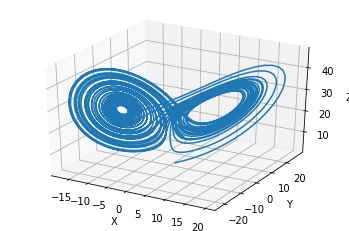

In [79]:
fig = plt.figure()


ax = fig.gca(projection='3d')
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig('xyz-noisy.pdf')

plt.show()

## The learned model captures the dynamics in weak noise limit also. 

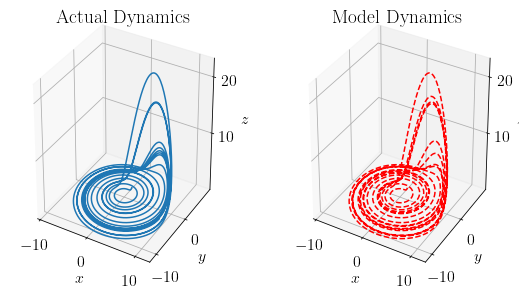

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rc('font', size=16)
plt.rc('legend', fontsize=10)



filename = 'data1.dat'

f = open(filename, 'r')
lines = f.readlines()
x = np.array( [ np.float128(line.split()[0]) for line in lines ] )
y = np.array( [ np.float128(line.split()[1]) for line in lines ] )
z = np.array( [ np.float128(line.split()[2]) for line in lines ] )
x1= np.array( [ np.float128(line.split()[3]) for line in lines ] )
y1= np.array( [ np.float128(line.split()[4]) for line in lines ] )
z1= np.array( [ np.float128(line.split()[5]) for line in lines ] )
f.close()



fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(131, projection="3d")
ax.plot(x,y,z)
plt.title(r"Actual Dynamics")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")



ax = fig.add_subplot(132, projection="3d")
ax.plot(x1,y1,z1,'r--')
plt.title(r"Model Dynamics")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")


plt.savefig('both.pdf',bbox_inches = 'tight',pad_inches = 0.5)